In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


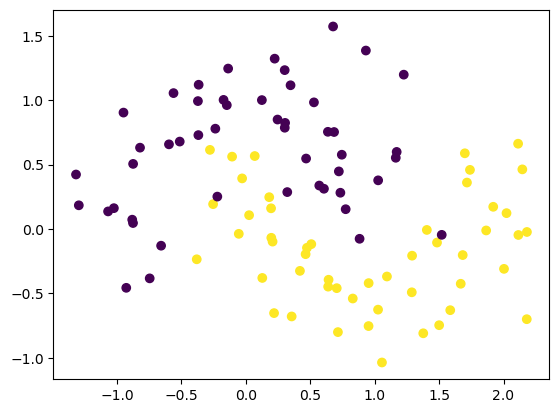

In [4]:
plt.scatter(df['3.159499363321345566e-02'],df['9.869877579082642072e-01'],c=df['0.000000000000000000e+00'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\ritik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 0.31895322, -0.2773078 ,  0.7566967 , -1.1388528 ,  0.82873434,
         -0.63598686, -1.580638  ,  0.4583665 , -1.4319998 ,  0.55028695],
        [ 0.50175756,  0.5990573 , -1.6112549 ,  1.1896563 ,  0.97434926,
          0.18835638,  0.24252862, -1.9495641 , -1.6972804 ,  1.5311925 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.18200916,  0.28370345, -0.14576903,  0.13730523, -0.43638867,
         -0.9440728 ,  0.12851176, -0.64248735,  0.05045183, -0.257642  ],
        [-0.1822876 , -0.86128825,  0.8927625 , -0.08390716,  0.5505349 ,
         -0.1208869 ,  0.25916   ,  0.31433624, -0.0256189 ,  0.86761504],
        [ 0.5873178 ,  0.95332444,  0.39533284,  0.77365345,  0.26073048,
          0.20636868, -0.54219913, -0.47082746, -0.47828928,  0.4424889 ],
        [ 0.28553352, -0.6531536 , -0.59636474, -0.6552172 , -0.825845  ,
         -0.0074476 ,  0.31012094,  0.17274433,  0.9632609 , -0.7287313 ],
        [-0.16280

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[ 0.05760325,  1.5157037 ,  0.5165247 , -0.5256559 , -1.5109684 ,
          0.10811993, -0.45671746,  0.07090373, -0.1597015 ,  0.17781554],
        [-0.6419486 , -0.2213344 , -0.09698571,  0.2315839 , -0.44870484,
         -0.2610634 ,  0.26248658,  0.61571205,  0.8592754 ,  0.13238816]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.06793885, -0.15204065,  0.2082675 ,  0.383365  , -0.11174091,
         -0.05343866,  0.25747395, -0.19525106,  0.17887321,  0.40040913],
        [-0.29490313,  0.14384975,  0.47678915,  0.06384537,  0.24241823,
         -0.29335004,  0.12835744, -0.14027528, -0.07637793, -0.04536314],
        [ 0.68815005,  0.25152278,  0.10406733, -0.15109208, -0.32386094,
          0.07435968,  0.15251188, -0.0457891 , -0.09379565,  0.11152951],
        [ 0.03733857,  0.4102697 , -0.48208708,  0.16352546,  0.39657706,
         -0.33863497, -0.24682987,  0.06741456, -0.0444468 ,  0.5447088 ],
        [ 0.13849

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5612 - loss: 0.6710 - val_accuracy: 0.5500 - val_loss: 0.6758
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5826 - loss: 0.6685 - val_accuracy: 0.5000 - val_loss: 0.6691
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6115 - loss: 0.6591 - val_accuracy: 0.5000 - val_loss: 0.6625
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5739 - loss: 0.6592 - val_accuracy: 0.6000 - val_loss: 0.6561
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6343 - loss: 0.6521 - val_accuracy: 0.7500 - val_loss: 0.6496
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7123 - loss: 0.6507 - val_accuracy: 0.9000 - val_loss: 0.6431
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7265 - loss: 0.6458 - val_accuracy: 0.9000 - val_loss: 0.6366
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7601 - loss: 0.6370 - val_accuracy: 0.9000 - val_loss

In [15]:
model.get_weights()

[array([[ 0.23645125,  1.6173021 ,  0.62812847, -0.5171078 , -1.6602758 ,
          0.0959131 , -0.36060187,  0.17391998, -0.10008778,  0.18770306],
        [-0.87609714, -0.4610361 , -0.05065649,  0.40119854, -0.33118287,
         -0.37058127,  0.4778415 ,  0.85157543,  1.0969195 ,  0.03234385]],
       dtype=float32),
 array([ 0.22704521,  0.10760552,  0.0420328 , -0.10861748, -0.10595408,
         0.06487502,  0.10314148,  0.16264896,  0.10999769, -0.14983667],
       dtype=float32),
 array([[-0.10568035, -0.23639214,  0.42176333,  0.6471813 , -0.26667753,
         -0.0900506 ,  0.17218618, -0.41203567,  0.09377937,  0.19897185],
        [-0.25147   ,  0.07325345,  0.59286875,  0.1857239 ,  0.24449451,
         -0.08999386,  0.09170806, -0.12133731, -0.09804846, -0.01923231],
        [ 0.71957964,  0.18172841,  0.22144233, -0.02419273, -0.32985494,
          0.28281578,  0.11773624, -0.04139173, -0.1143429 ,  0.12469792],
        [ 0.18830885,  0.4102697 , -0.4416976 ,  0.12776008, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 559us/step


<Axes: >

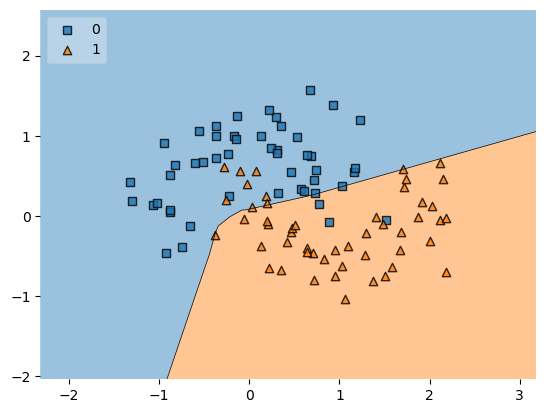

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [17]:
(np.random.randn(10,10)*0.01).min()

-0.02340285630947385

In [18]:
(np.random.randn(10,10)*0.01).max()

0.014557463543962111